# Stationarity Test and First Deifference

In [1]:
import pandas as pd # import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%cd CSV_file_from_2007_to_2017

/Users/Seychelles/Desktop/GoogleTensorflow/Data_Collector/CSV_file_from_2007_to_2017


In [3]:
df_n = pd.read_csv("test.csv") #load data set saved from previous ops


In [4]:
df_n['PM10']= pd.to_numeric(df_n['PM10']) # Convert PM_10 column to Numeric Values

In [5]:
df_n['PM10'].replace('NaN', np.NaN)[1:3] #replace NAn with zero np.nan

1      NaN
2    61.67
Name: PM10, dtype: float64

In [6]:
df_n[1:2]

,Unnamed: 0,date,Lat,Lon,PM10,NAME
1,1,2007-01-26 10:00:00,42.0036,21.4636,NaN,Gazi Baba


In [7]:
df_n.date= pd.to_datetime(df_n.date)  # CONVER TO DATE TIME 

In [8]:
df_n[1:2] # 

,Unnamed: 0,date,Lat,Lon,PM10,NAME
1,1,2007-01-26 10:00:00,42.0036,21.4636,NaN,Gazi Baba


In [9]:
df_n.drop(['Lat','Lon','NAME','Unnamed: 0'], axis = 1, inplace = True, errors = 'ignore')
#drop non useful columns

In [10]:
df_n.date= pd.to_datetime(df_n.date)  # Convert to dat time

In [11]:
df_n.sort_values(by='date',ascending=True,inplace=True) # sort data sets

In [12]:
df_n[1:2]

,date,PM10
9408,2007-01-02,NaN


In [13]:
df_n.set_index('date',inplace=True); # set index as date 
del df_n.index.name  # delete index name

In [14]:
import statsmodels.api as sm  
from statsmodels.tsa.seasonal import seasonal_decompose
PM10_data_ = df_n['2012'].copy(deep=True) 
#PM10_data_.replace([np.inf, -np.inf], np.nan,inplace=True);
PM10_data_=PM10_data_.fillna(0)


In [16]:
#Test for Stationarity 
#Function to test for Stationarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

<b> Standsrdize data </b>

In [17]:
PM10_data_.PM10 = (PM10_data_.PM10 - PM10_data_.PM10.mean())/(PM10_data_.PM10.max()-PM10_data_.PM10.min())

<b>Test stationarity</b>

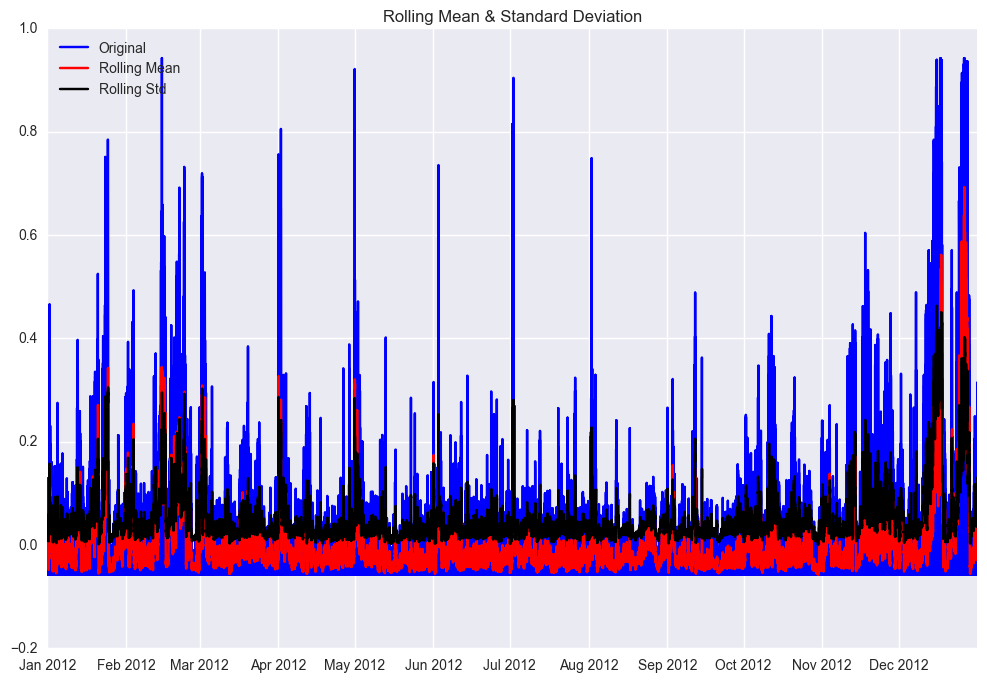

Results of Dickey-Fuller Test:
Test Statistic                -1.125387e+01
p-value                        1.685844e-20
#Lags Used                     6.100000e+01
Number of Observations Used    6.258800e+04
Critical Value (1%)           -3.430454e+00
Critical Value (5%)           -2.861586e+00
Critical Value (10%)          -2.566795e+00
dtype: float64


In [18]:
test_stationarity(PM10_data_.PM10)

<p><b><u>Explanation of Results</u></b></p>
<p>There are two ways to check the stationarity of a time series. The first is by looking at the data- which we can observe by viewing from the plots in the previous notebook. By plots of the data it should be easy to identify the changing mean or variation in the data.</p>
<p> A more accurate assessment  is the Dickey-Fuller test.  If the ‘Test Statistic’ is greater than the ‘Critical Value’ then the time series is stationary. From the results we can observe that the Test statistic is less than  the critical value. Which means the data set is not stationary.</p>
<p> for more insights: </p>
<p>http://people.duke.edu/%7Ernau/whatuse.htm </p>
<p> http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/ </p>

In [34]:
PM10_data_['difference'] = PM10_data_.PM10 - PM10_data_.PM10.shift(1)

In [35]:
PM10_data_[1:2]


,PM10,difference
2012-01-01,-0.004027,-0.093794


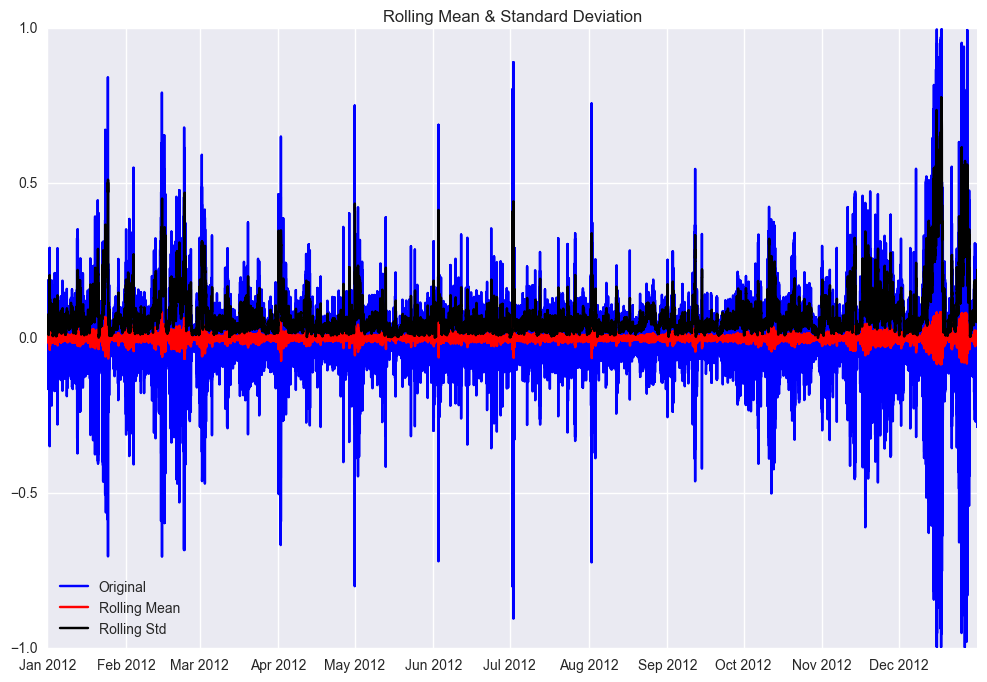

Results of Dickey-Fuller Test:
Test Statistic                   -40.470985
p-value                            0.000000
#Lags Used                        61.000000
Number of Observations Used    62588.000000
Critical Value (1%)               -3.430454
Critical Value (5%)               -2.861586
Critical Value (10%)              -2.566795
dtype: float64


In [40]:
test_stationarity(PM10_data_.difference.fillna(0))

<p> <b> Explanation Of stationarity above </b> </p>
<p>From the results above we observe that the Test Statisitics is less than Critical value so the series is now stationary -- This can be observed from the p values too.</p>

In [41]:
# We can also observe compute seasonal difference 
PM10_data_['seasonal difference'] = PM10_data_.PM10 - PM10_data_.PM10.shift(12)

In [45]:
PM10_data_[10:15]

,PM10,difference,seasonal difference
2012-01-01 01:00:00,-0.034977,-0.017577,NaN
2012-01-01 01:00:00,-0.057751,-0.022774,NaN
2012-01-01 01:00:00,-0.040565,0.017186,-0.130332
2012-01-01 01:00:00,0.026642,0.067208,0.030669
2012-01-01 02:00:00,-0.057751,-0.084393,-0.051647


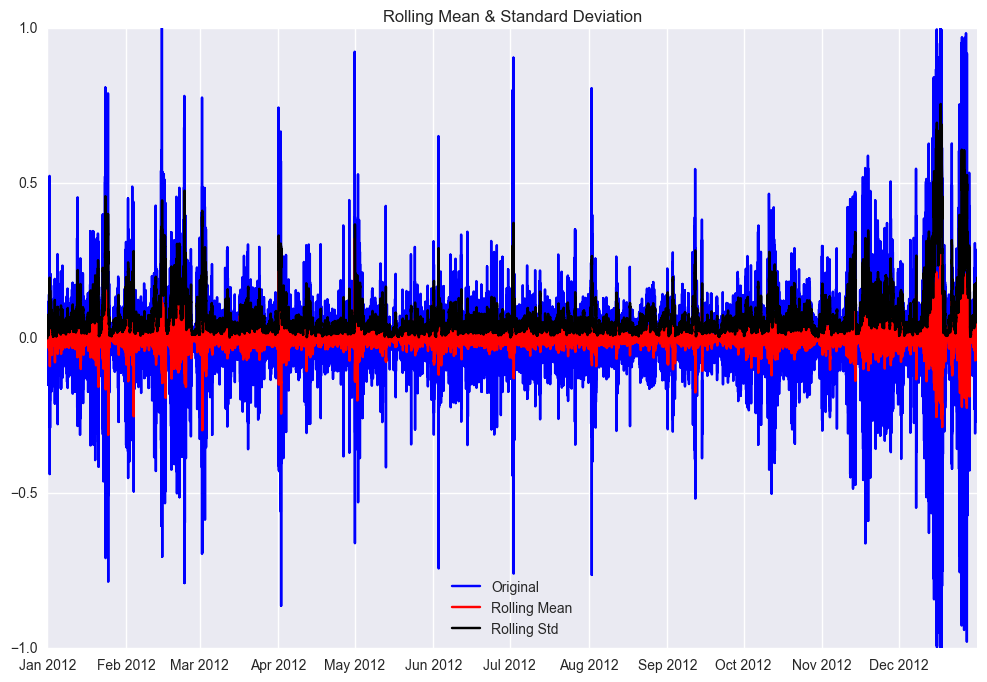

Results of Dickey-Fuller Test:
Test Statistic                   -38.948977
p-value                            0.000000
#Lags Used                        60.000000
Number of Observations Used    62589.000000
Critical Value (1%)               -3.430454
Critical Value (5%)               -2.861586
Critical Value (10%)              -2.566795
dtype: float64


In [46]:
test_stationarity(PM10_data_['seasonal difference'].fillna(0))

<p> <b> Explanation </b> </p>
<p> We can see that the first difference will be a good choce for us. Though the seasonal difference can be of use too </p>

#  Correlogram and Partial  Autocorrelation Plot

<p> We can also replot the autocorrelation plot</p>

<p><b>Plots Using Pandas.</b></p>


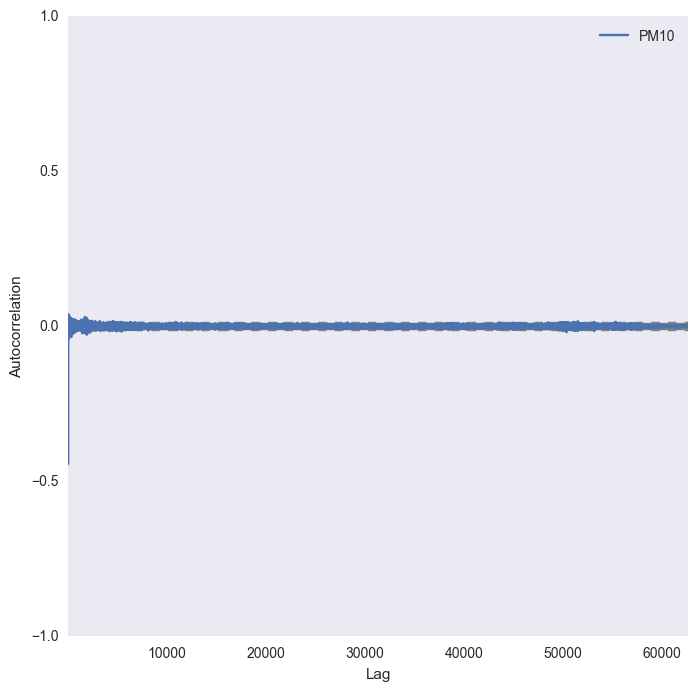

In [57]:
from pandas.tools.plotting import autocorrelation_plot

fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(8)

# we can just use 2008 oon the df_indexed_with_date as below. Same result obtained
_ = autocorrelation_plot(PM10_data_['difference'].fillna(0), label='PM10')
_ = plt.legend(loc='upper right')

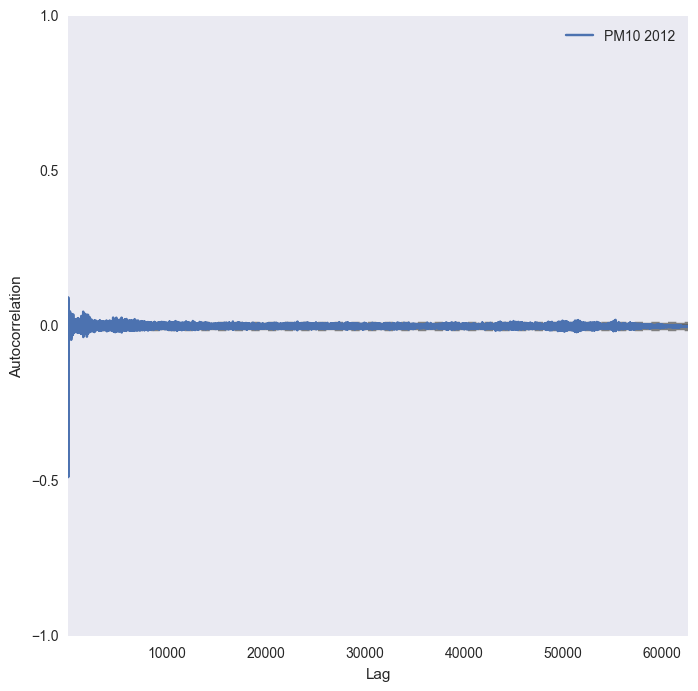

In [58]:
from pandas.tools.plotting import autocorrelation_plot

fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(8)

# we can just use 2008 oon the df_indexed_with_date as below. Same result obtained
_ = autocorrelation_plot(PM10_data_['seasonal difference'].fillna(0), label='PM10 2012')
_ = plt.legend(loc='upper right')

<p><b> Using satatmodels: ACF and PACF </b> </p>

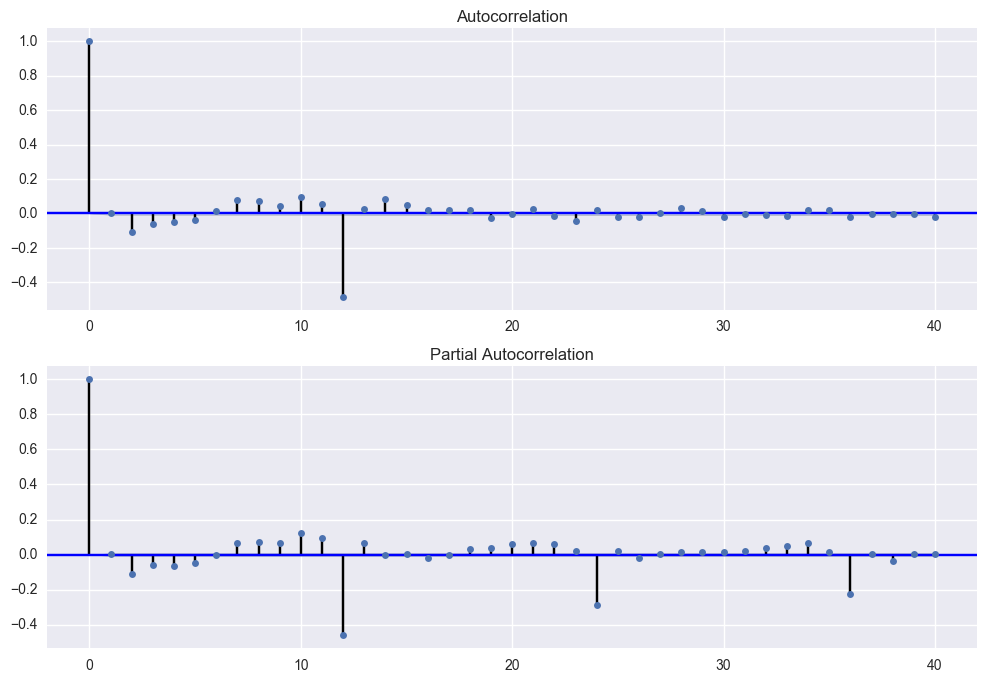

In [49]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(PM10_data_['seasonal difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(PM10_data_['seasonal difference'].iloc[13:], lags=40, ax=ax2)

<p> <b>Autocorrelation Plot for first difference<b> <p>

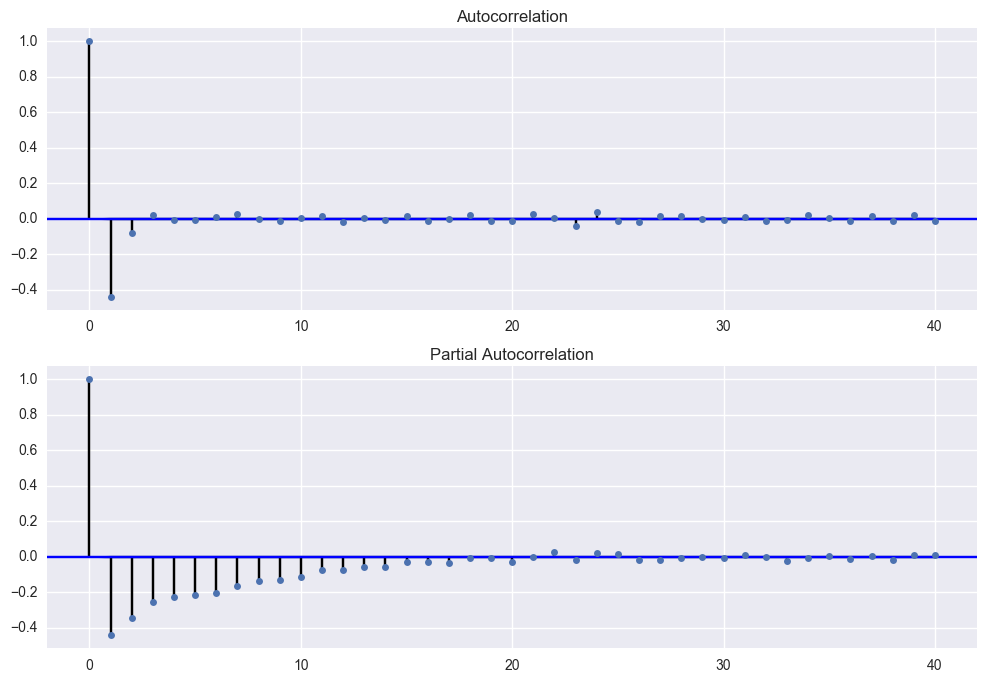

In [51]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(PM10_data_['difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(PM10_data_['difference'].iloc[13:], lags=40, ax=ax2)

for reference:
http://people.duke.edu/%7Ernau/411home.htm    

# Final Note on Stationarity

<p><b> What does it mean for data to be stationary?</b>
The mean of the series should not be a function of time. The red graph below is not stationary because the mean increases over time. </p>


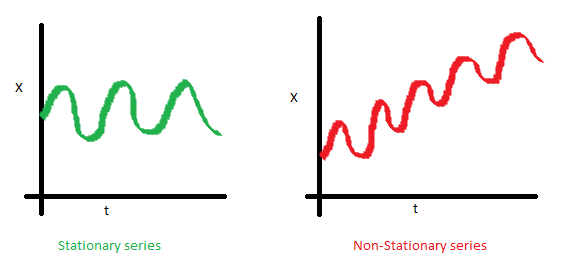

In [88]:
IPython.display.Image("CSV_file_from_2007_to_2017/Mean_nonstationary.png")

<p>The variance of the series should not be a function of time. This property is known as homoscedasticity. Notice in the red graph the varying spread of data over time.  See below</p>

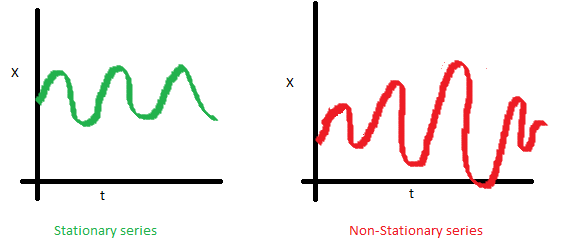

In [89]:
IPython.display.Image("CSV_file_from_2007_to_2017/Var_nonstationary.png")

<p>Finally, the covariance of the i th term and the (i + m) th term should not be a function of time. In the following graph, you will notice the spread becomes closer as the time increases. Hence, the covariance is not constant with time for the ‘red series’. </p>

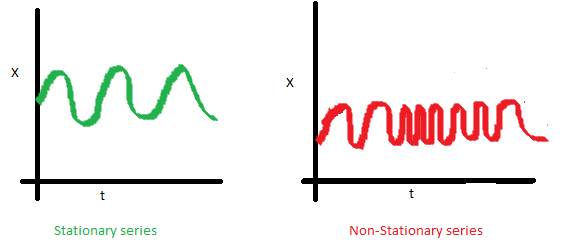

In [90]:
IPython.display.Image("CSV_file_from_2007_to_2017/Cov_nonstationary.png")

Why is this important? When running a linear regression the assumption is that all of the observations are all independent of each other. In a time series, however, we know that observations are time dependent. It turns out that a lot of nice results that hold for independent random variables (law of large numbers and central limit theorem to name a couple) hold for stationary random variables. So by making the data stationary, we can actually apply regression techniques to this time dependent variable.

<p> Image source :
http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/</p>
<p>Additional Sources : 
https://github.com/silicon-valley-data-science/pydata-sf-2016-arima-tutorial/blob/master/Section_5_ClosingRemarks_tutorial.ipynb <p> 
https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/</p> </p>